In [2]:
import pandas as pd
import numpy as np

import warnings
from math import pi
import seaborn as sns
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
from IPython.display import HTML,display

sns.set(style="whitegrid", font_scale=1.75)


# prettify plots
plt.rcParams['figure.figsize'] = [20.0, 5.0]
    
%matplotlib inline

warnings.filterwarnings("ignore")

In [3]:
DATASETS_FOLDER="../datasets/"
!ls ../datasets/

deepnetts-linear-regression-validation.csv
deepnetts-tribuo-4-lr-ensembles-average.csv
deepnetts-tribuo-4-lr-ensembles-geomean.csv
deepnetts-tribuo-4-lr-ensembles-harmonic-mean.csv
deepnetts-tribuo-4-lr-ensembles-median.csv
linear-for-deepnetts.csv
linear-for-tribuo.csv
tribuo-3-lr-ensembles-average.csv
tribuo-3-lr-ensembles-geomean.csv
tribuo-3-lr-ensembles-harmonic-mean.csv
tribuo-3-lr-ensembles-median.csv
tribuo-linear-regression-ada-validation.csv
tribuo-linear-regression-cart-validation.csv
tribuo-linear-regression-sgd-validation.csv
tribuo-linear-regression-xgb-validation.csv


In [4]:
column_names = ['X_input', 'y_prediction']

deepnetts_lr_validation = pd.read_csv(f'{DATASETS_FOLDER}/deepnetts-linear-regression-validation.csv')
deepnetts_lr_validation.columns = column_names

tribuo_lr_sgd_validation = pd.read_csv(f'{DATASETS_FOLDER}/tribuo-linear-regression-sgd-validation.csv')
tribuo_lr_sgd_validation.columns = column_names

tribuo_lr_ada_validation = pd.read_csv(f'{DATASETS_FOLDER}/tribuo-linear-regression-ada-validation.csv')
tribuo_lr_ada_validation.columns = column_names
tribuo_lr_cart_validation = pd.read_csv(f'{DATASETS_FOLDER}/tribuo-linear-regression-cart-validation.csv')
tribuo_lr_cart_validation.columns = column_names
tribuo_lr_xgb_validation = pd.read_csv(f'{DATASETS_FOLDER}/tribuo-linear-regression-xgb-validation.csv')
tribuo_lr_xgb_validation.columns = column_names

tribuo_3_lr_ensembles_average = pd.read_csv(f'{DATASETS_FOLDER}/tribuo-3-lr-ensembles-average.csv')
tribuo_3_lr_ensembles_average.columns = column_names
tribuo_3_lr_ensembles_median = pd.read_csv(f'{DATASETS_FOLDER}/tribuo-3-lr-ensembles-median.csv')
tribuo_3_lr_ensembles_median.columns = column_names
tribuo_3_lr_ensembles_geomean = pd.read_csv(f'{DATASETS_FOLDER}/tribuo-3-lr-ensembles-geomean.csv')
tribuo_3_lr_ensembles_geomean.columns = column_names
tribuo_3_lr_ensembles_harmonic_mean = pd.read_csv(f'{DATASETS_FOLDER}/tribuo-3-lr-ensembles-harmonic-mean.csv')
tribuo_3_lr_ensembles_harmonic_mean.columns = column_names                                            

In [5]:
def geometric_mean_of(distribution):
    index = 0
    N = len(distribution)
    result = 1
    for index in range(0, N):
        result = result * distribution[index]
    if N != 0:
        return abs(result) ** (1 / N)
    else:
        raise ValueError('No distribution has been passed in, cannot compute Geometric Mean')

In [6]:
def harmonic_mean_of(distribution):
    index = 0
    N = len(distribution)
    result = 0
    for index in range(0, N):
        if distribution[index] != 0:
            result = result + (1 / distribution[index])

    if result == 0:
        raise ValueError('Distribution contains one or more zeros, cannot compute Harmonic Mean')
    else:
        return 1 / result

### Legend

- **NN**: Neural Networks
- **SGD**: Stochastic Gradient Descent
- **LR**: Linear Regression
- **ADA**: Adam Optimiser
- **CART**: Classification And Regression Trees (Ensemble)
- **XGB**: XGBoost

### Plotting all the input data (they should be the same)

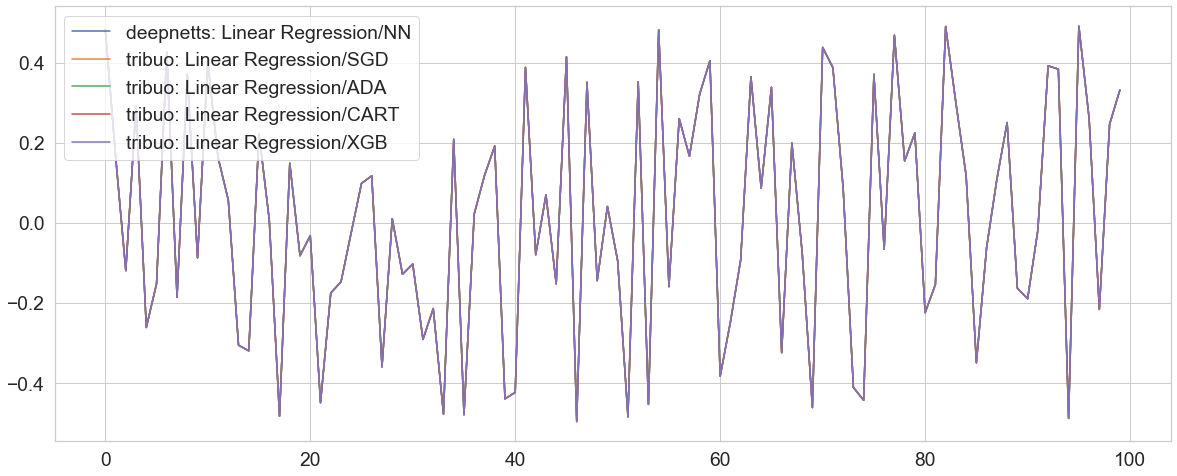

In [8]:
plt.rcParams['figure.figsize'] = [20.0, 8.0]
deepnetts_lr_validation.X_input.plot()
tribuo_lr_sgd_validation.X_input.plot()
tribuo_lr_ada_validation.X_input.plot()
tribuo_lr_cart_validation.X_input.plot()
tribuo_lr_xgb_validation.X_input.plot()
plt.legend(['deepnetts: Linear Regression/NN', 
            'tribuo: Linear Regression/SGD',
            'tribuo: Linear Regression/ADA',
            'tribuo: Linear Regression/CART',
            'tribuo: Linear Regression/XGB'])

### Taking a closer look at the prediction results of 'tribuo: LR/SGD' (Tribuo's Linear Regression using the SGD algorithm)

We won't be using this one for ensembling as it seems to be on a different scale.

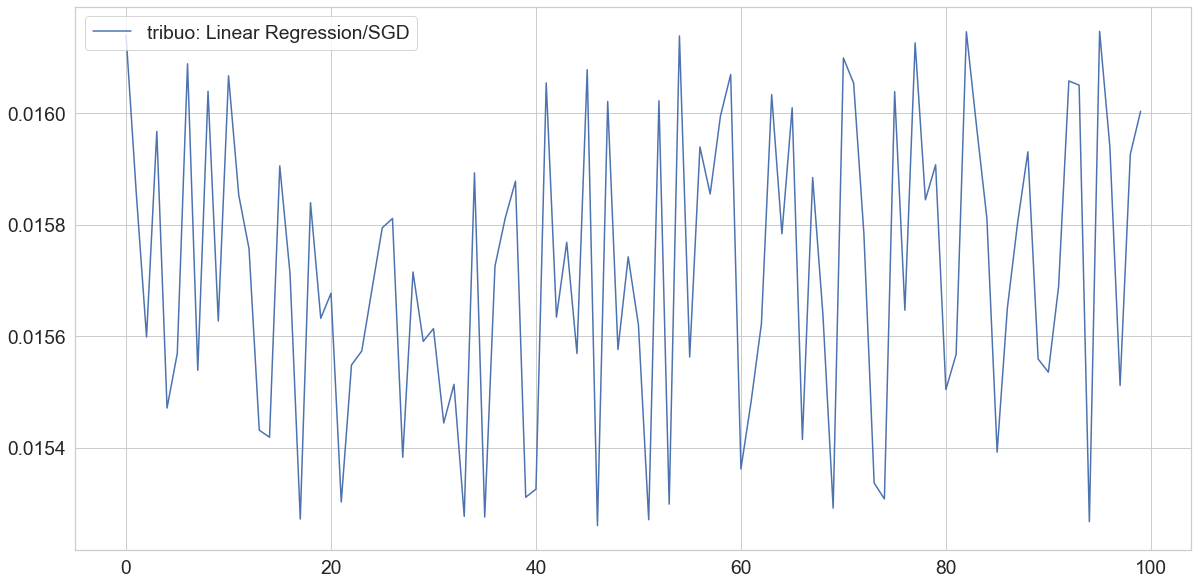

In [9]:
plt.rcParams['figure.figsize'] = [20.0, 10.0]
tribuo_lr_sgd_validation.y_prediction.plot()
plt.legend(['tribuo: Linear Regression/SGD'])

### Comparing results from DeepNetts: NN and Tribuo Linear Regression: ADA, CART and XGBoost

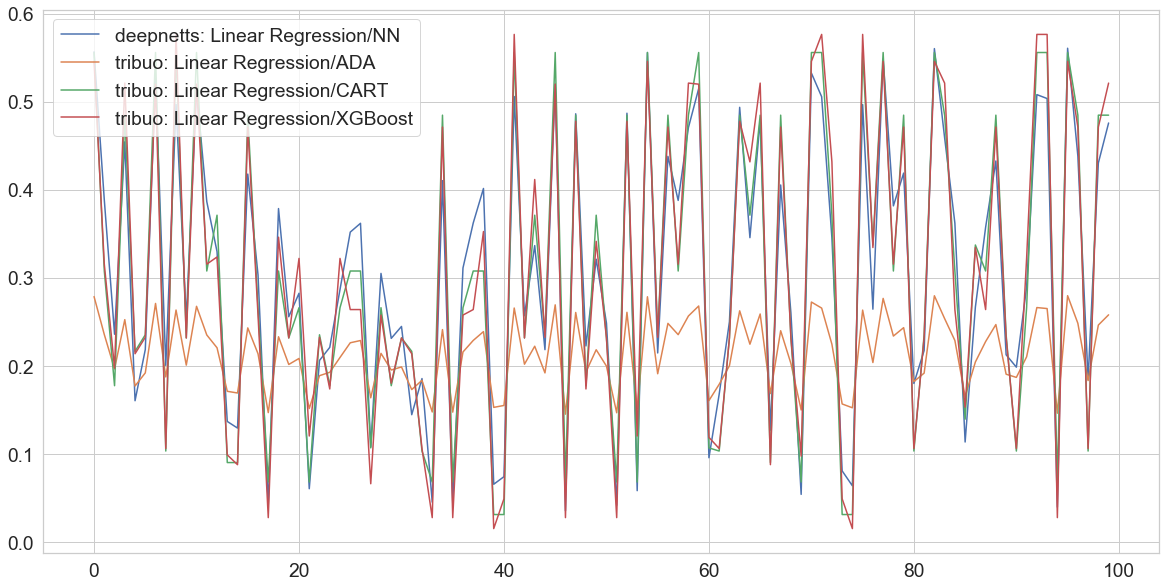

In [17]:
plt.rcParams['figure.figsize'] = [20.0, 10.0]
deepnetts_lr_validation.y_prediction.plot()
tribuo_lr_ada_validation.y_prediction.plot()
tribuo_lr_cart_validation.y_prediction.plot()
tribuo_lr_xgb_validation.y_prediction.plot()
plt.legend(['deepnetts: Linear Regression/NN', 
            'tribuo: Linear Regression/ADA', 
            'tribuo: Linear Regression/CART', 
            'tribuo: Linear Regression/XGBoost'])

### Comparing all of the above methods (DeepNetts: NN, and Tribuo Linear Regression: ADA, CART and XGBoost)

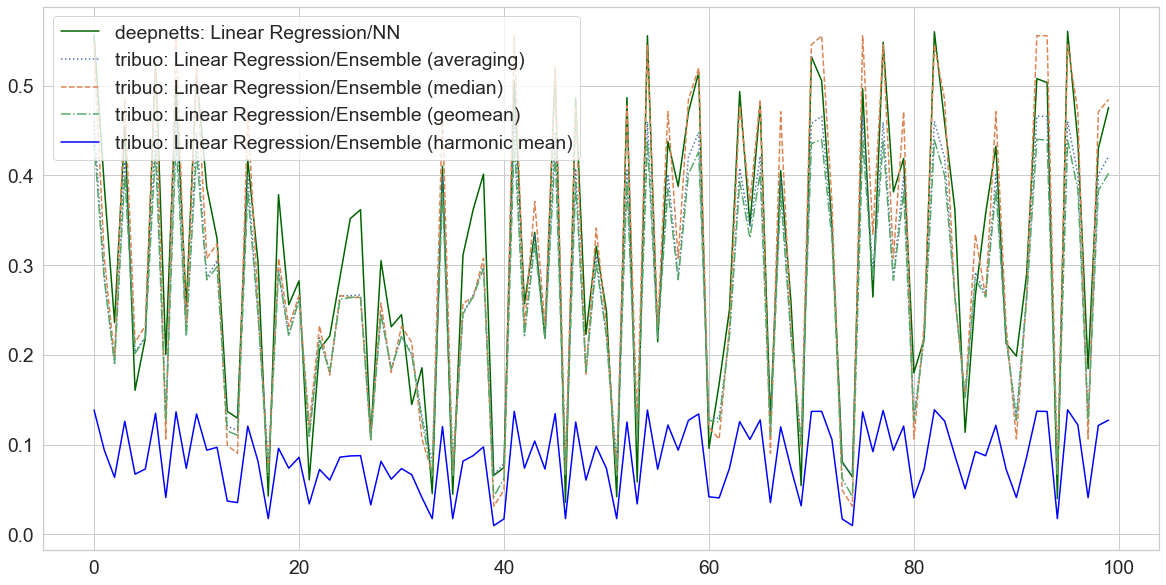

In [19]:
plt.rcParams['figure.figsize'] = [20.0, 10.0]
deepnetts_lr_validation.y_prediction.plot(color="darkgreen")
tribuo_3_lr_ensembles_average.y_prediction.plot(linestyle="dotted")
tribuo_3_lr_ensembles_median.y_prediction.plot(linestyle="dashed")
tribuo_3_lr_ensembles_geomean.y_prediction.plot(linestyle="dashdot")
tribuo_3_lr_ensembles_harmonic_mean.y_prediction.plot(color="blue")
plt.legend(['deepnetts: Linear Regression/NN', 
            'tribuo: Linear Regression/Ensemble (averaging)', 
            'tribuo: Linear Regression/Ensemble (median)', 
            'tribuo: Linear Regression/Ensemble (geomean)',
            'tribuo: Linear Regression/Ensemble (harmonic mean)'])

### Taking a closer look at the ensembled results using the harmonic mean

We won't be using this one for further ensembling as it seems to be on a different scale as compared to the others.

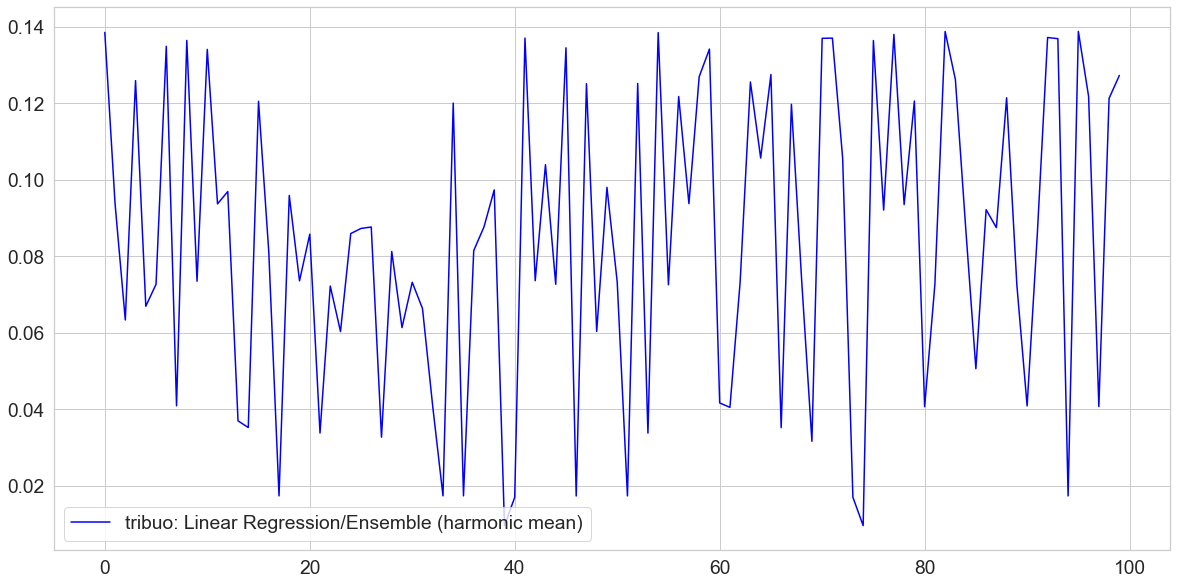

In [20]:
tribuo_3_lr_ensembles_harmonic_mean.y_prediction.plot(color="blue")
plt.legend(['tribuo: Linear Regression/Ensemble (harmonic mean)'])

### Ensembling by averaging method (DeepNetts: NN & Tribuo Linear Regression: ADA, CART and XGBoost (all 3 ensembled))

In [30]:
deepnetts_tribuo_4_lr_ensembles_average = tribuo_lr_ada_validation.copy()
deepnetts_tribuo_4_lr_ensembles_average.y_prediction = (deepnetts_lr_validation.y_prediction \
            + tribuo_lr_ada_validation.y_prediction + tribuo_lr_cart_validation.y_prediction + \
            tribuo_lr_xgb_validation.y_prediction) / 4
deepnetts_tribuo_4_lr_ensembles_average.to_csv(f'{DATASETS_FOLDER}/deepnetts-tribuo-4-lr-ensembles-average.csv',index=False)

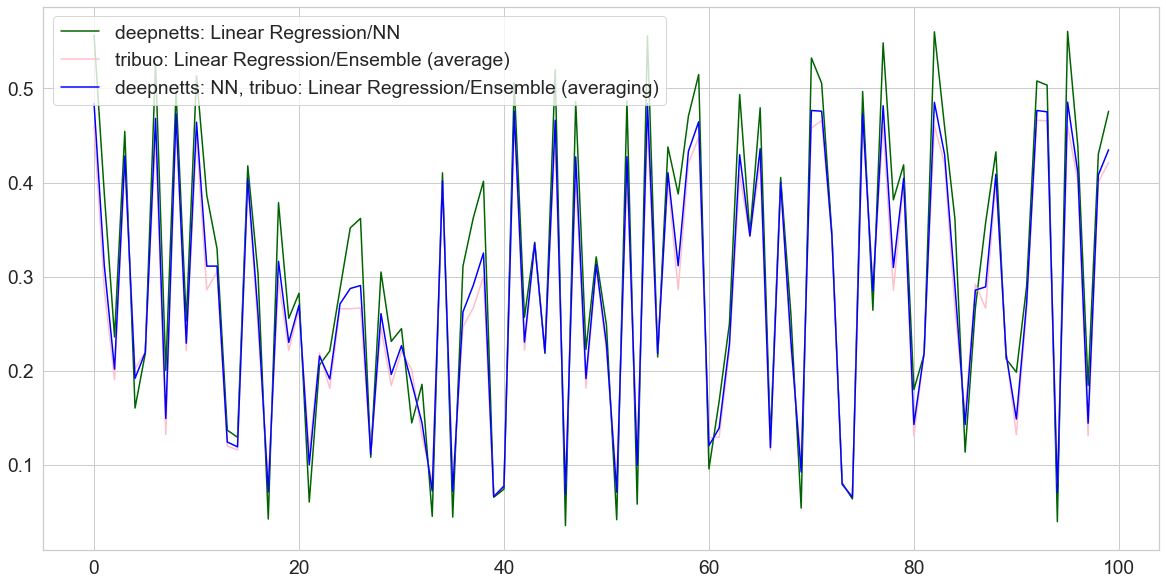

In [31]:
plt.rcParams['figure.figsize'] = [20.0, 10.0]
deepnetts_lr_validation.y_prediction.plot(color="darkgreen")
tribuo_3_lr_ensembles_average.y_prediction.plot(color="pink")
deepnetts_tribuo_4_lr_ensembles_average.y_prediction.plot(color="blue")
plt.legend(['deepnetts: Linear Regression/NN', 
            'tribuo: Linear Regression/Ensemble (average)',
            'deepnetts: NN, tribuo: Linear Regression/Ensemble (averaging)'])

### Ensembling by median method (DeepNetts: NN & Tribuo Linear Regression: ADA, CART and XGBoost (all 3 ensembled))

In [34]:
deepnetts_tribuo_4_lr_ensembles_median = tribuo_lr_ada_validation.copy()
concatenated_df = pd.concat([deepnetts_lr_validation.y_prediction, \
                             tribuo_lr_ada_validation.y_prediction, \
                             tribuo_lr_cart_validation.y_prediction, \
                             tribuo_lr_xgb_validation.y_prediction], axis=1)
deepnetts_tribuo_4_lr_ensembles_median.y_prediction = np.median(concatenated_df, axis=1)
deepnetts_tribuo_4_lr_ensembles_median.to_csv(f'{DATASETS_FOLDER}/deepnetts-tribuo-4-lr-ensembles-median.csv',index=False)

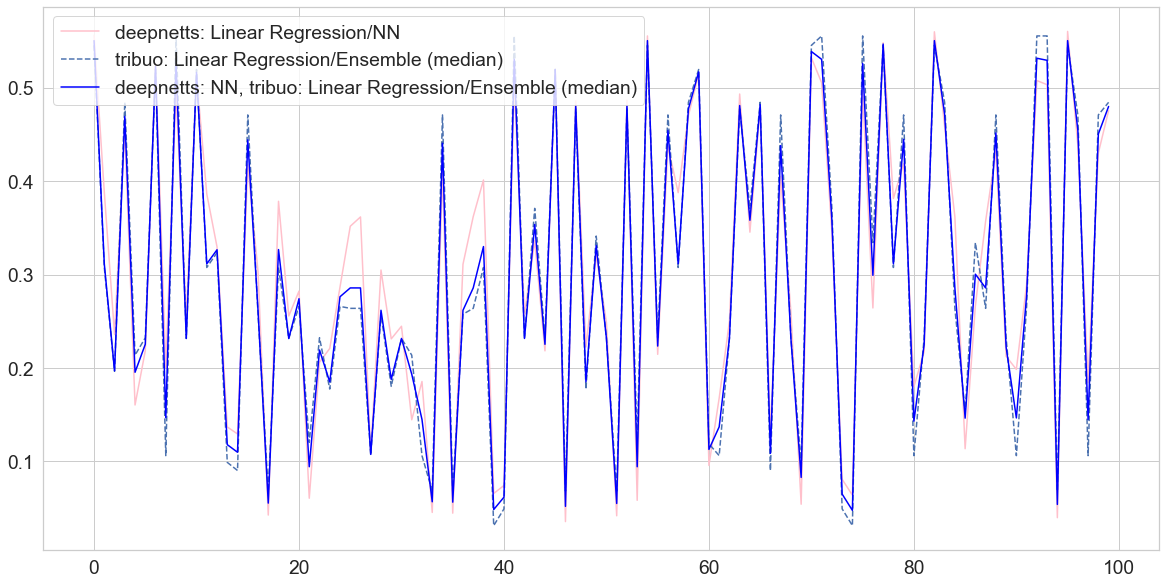

In [39]:
plt.rcParams['figure.figsize'] = [20.0, 10.0]
deepnetts_lr_validation.y_prediction.plot(color="pink")
tribuo_3_lr_ensembles_median.y_prediction.plot(linestyle="dashed")
deepnetts_tribuo_4_lr_ensembles_median.y_prediction.plot(color="blue")
plt.legend(['deepnetts: Linear Regression/NN', 
            'tribuo: Linear Regression/Ensemble (median)',
            'deepnetts: NN, tribuo: Linear Regression/Ensemble (median)'])

### Ensembling by geometric mean method (DeepNetts: NN & Tribuo Linear Regression: ADA, CART and XGBoost (all 3 ensembled))

In [44]:
deepnetts_tribuo_4_lr_ensembles_geomean = tribuo_lr_ada_validation.copy()
deepnetts_tribuo_4_lr_ensembles_geomean.y_prediction = concatenated_df.y_prediction.apply(geometric_mean_of, axis=1)
deepnetts_tribuo_4_lr_ensembles_geomean.to_csv(f'{DATASETS_FOLDER}/deepnetts-tribuo-4-lr-ensembles-geomean.csv',index=False)

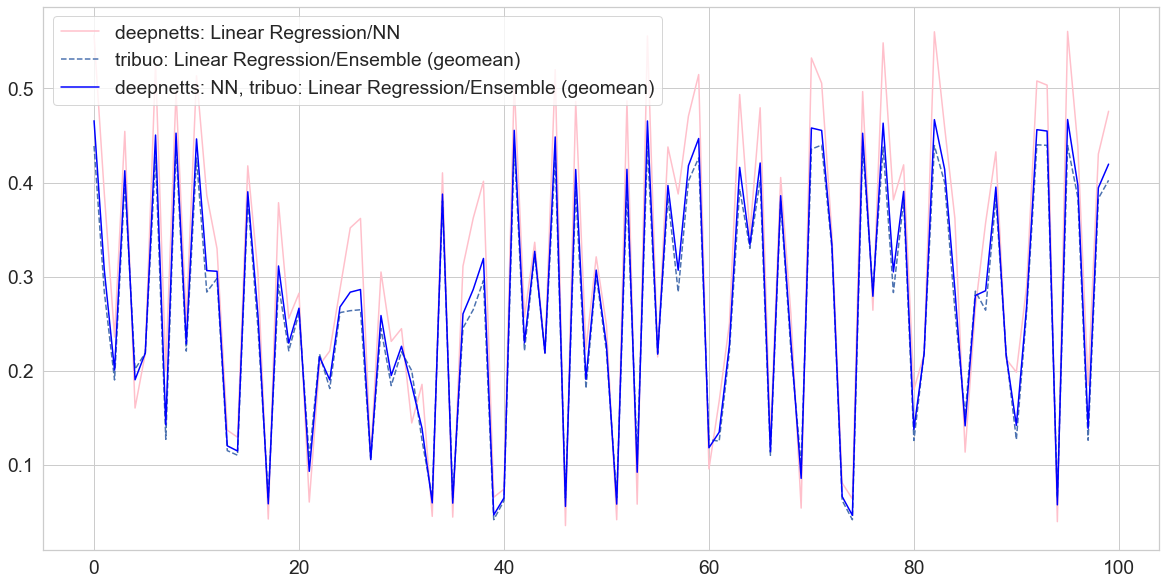

In [45]:
plt.rcParams['figure.figsize'] = [20.0, 10.0]
deepnetts_lr_validation.y_prediction.plot(color="pink")
tribuo_3_lr_ensembles_geomean.y_prediction.plot(linestyle="dashed")
deepnetts_tribuo_4_lr_ensembles_geomean.y_prediction.plot(color="blue")
plt.legend(['deepnetts: Linear Regression/NN', 
            'tribuo: Linear Regression/Ensemble (geomean)',
            'deepnetts: NN, tribuo: Linear Regression/Ensemble (geomean)'])

### Ensembling by harmonic mean method (DeepNetts: NN & Tribuo Linear Regression: ADA, CART and XGBoost (all 3 ensembled))

In [46]:
deepnetts_tribuo_4_lr_ensembles_harmonic_mean = tribuo_lr_ada_validation.copy()
deepnetts_tribuo_4_lr_ensembles_harmonic_mean.y_prediction = concatenated_df.y_prediction.apply(harmonic_mean_of, axis=1)
deepnetts_tribuo_4_lr_ensembles_harmonic_mean.to_csv(f'{DATASETS_FOLDER}/deepnetts-tribuo-4-lr-ensembles-harmonic-mean.csv',index=False)

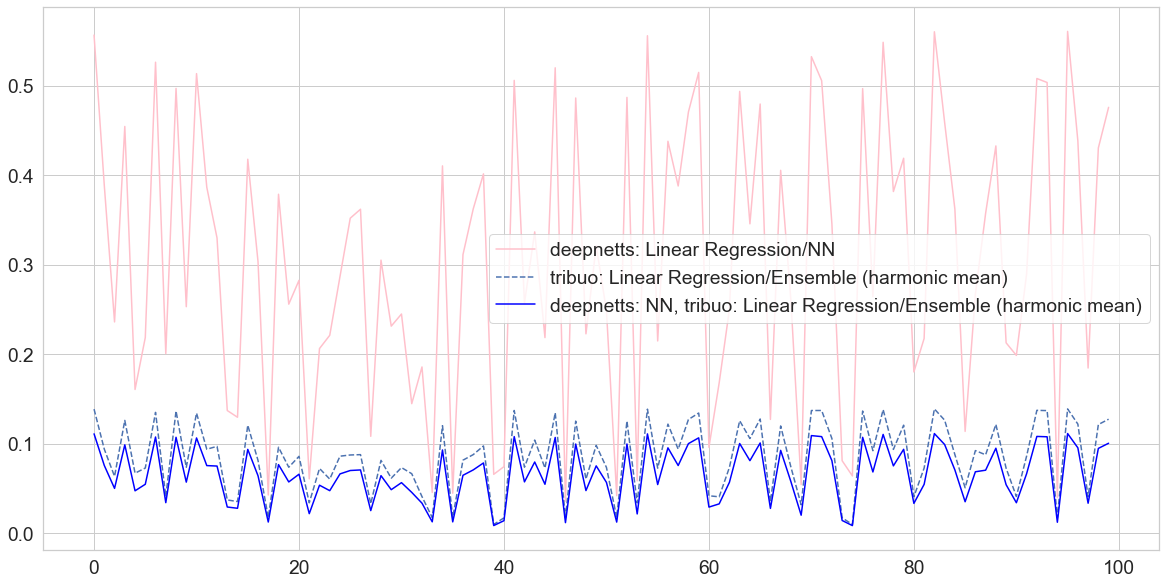

In [47]:
plt.rcParams['figure.figsize'] = [20.0, 10.0]
deepnetts_lr_validation.y_prediction.plot(color="pink")
tribuo_3_lr_ensembles_harmonic_mean.y_prediction.plot(linestyle="dashed")
deepnetts_tribuo_4_lr_ensembles_harmonic_mean.y_prediction.plot(color="blue")
plt.legend(['deepnetts: Linear Regression/NN', 
            'tribuo: Linear Regression/Ensemble (harmonic mean)',
            'deepnetts: NN, tribuo: Linear Regression/Ensemble (harmonic mean)'])

### Comparing all of the above methods (DeepNetts: NN and Tribuo Linear Regression: ADA, CART and XGBoost)

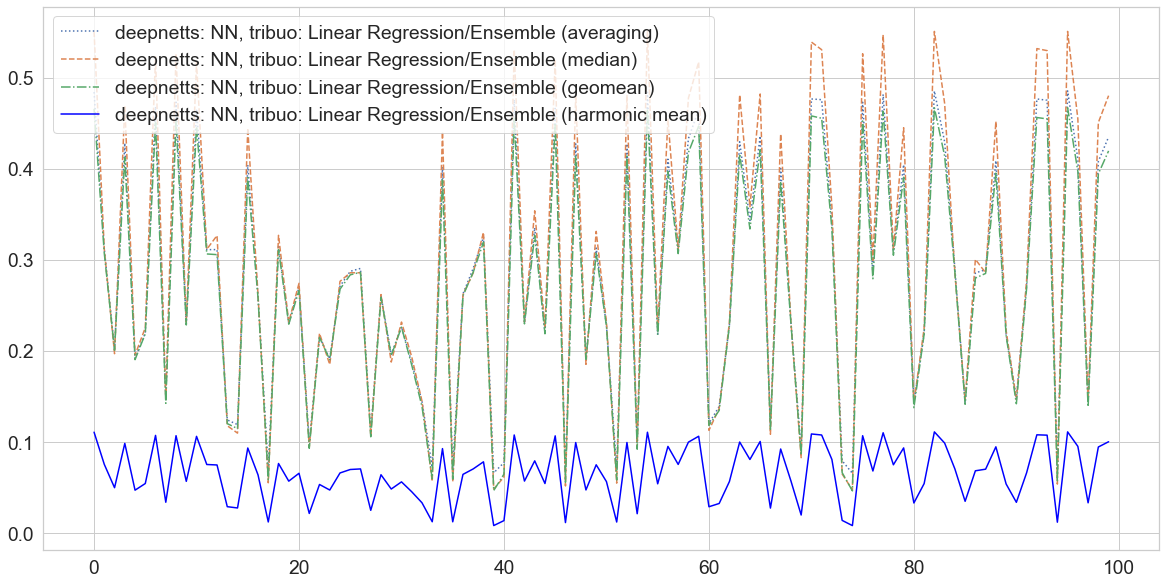

In [51]:
plt.rcParams['figure.figsize'] = [20.0, 10.0]
deepnetts_tribuo_4_lr_ensembles_average.y_prediction.plot(linestyle="dotted")
deepnetts_tribuo_4_lr_ensembles_median.y_prediction.plot(linestyle="dashed")
deepnetts_tribuo_4_lr_ensembles_geomean.y_prediction.plot(linestyle="dashdot")
deepnetts_tribuo_4_lr_ensembles_harmonic_mean.y_prediction.plot(color="blue")
plt.legend(['deepnetts: NN, tribuo: Linear Regression/Ensemble (averaging)', 
            'deepnetts: NN, tribuo: Linear Regression/Ensemble (median)', 
            'deepnetts: NN, tribuo: Linear Regression/Ensemble (geomean)',
            'deepnetts: NN, tribuo: Linear Regression/Ensemble (harmonic mean)'])

### We could stop here or continue creating more levels of ensembles.